<a href="https://colab.research.google.com/github/jenelaineDC/DSML-PROJECTS/blob/main/HR%20Analytics/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### BACKGROUND

The HR department at Salifort Motors has expressed concern about employee satisfaction and retention. While they have gathered data from their workforce, they lack clarity on how to transform this information into actionable insights. Employee turnover is a costly process involving recruitment, training, and lost productivity. Therefore, understanding the underlying reasons for employee attrition is crucial for supporting long-term organizational success.

### PROJECT GOAL

The primary goal of this project is to analyze employee data to uncover patterns and factors that influence employee turnover. Specifically, the aim is to:
- Build a predictive model that estimates whether an employee is likely to leave the company.
- Identify key drivers of employee attrition, providing HR with actionable insights.
-Support HR in designing data-driven strategies to improve employee satisfaction and retention.

### SCOPE AND LIMITATION

This project will:
- Use the employee data collected by the HR department at Salifort Motors.
- Perform exploratory data analysis (EDA) to identify relationships between employee attributes and turnover.
- Apply machine learning techniques to build and evaluate predictive models.
- Highlight the most important features contributing to employee attrition.
- Provide recommendations to HR for potential interventions aimed at improving employee satisfaction and retention.

This project will not:
- Collect additional employee data beyond the dataset provided.
- Address external market or economic factors outside the scope of internal HR policies.

#### SETUP

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/DSML PROJECTS/EMPLOYEE TURNOVER RATE

/content/drive/MyDrive/DSML PROJECTS/EMPLOYEE TURNOVER RATE


In [4]:
# for operational libraries
import numpy as np
import pandas as pd

# for visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# for preprocessing
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

# for modeling
from sklearn.model_selection import train_test_split, PredefinedSplit

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb

# for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# for evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
pd.set_option('display.max_columns', None)

### DATA DEVELOPMENT PROCESS

#### Data Source:

The dataset contains 15,000 rows and 10 columns for the variables listed below.

Data Source:
- [Google Advance Data Analytics Capstone](https://www.coursera.org/professional-certificates/google-advanced-data-analytics?action=enroll&msockid=2cdd450308916b111b1251dc09516a30)
- [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv)



Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

In [5]:
df0 = pd.read_csv("HR_capstone_dataset.csv")
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
# Check Data Information
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
# Gather descriptive statistics
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### Data Preprocessing Steps

The following data cleaning and preprocessing will be performed prior modelling:
- Handling Missing Values
- Removing Duplicated Entry
- Checking Outliers in Data

In [8]:
# Check column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [9]:
# Rename columns as needed
df0 = df0.rename(columns = {'Work_accident' : 'work_accident',
                            'time_spend_company' : 'tenure',
                            'Department' : 'department'})


# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [10]:
# Check for missing values
df0.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
tenure,0
work_accident,0
left,0
promotion_last_5years,0
department,0
salary,0


In [11]:
# Check for duplicates
df0.duplicated().sum()

np.int64(3008)

In [12]:
# Inspect rows containing duplicates
df0[df0.duplicated() == True]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [13]:
# Drop duplicates
df0.drop_duplicates(keep = 'first', inplace = True)

# Check is there are still duplicates
df0[df0.duplicated() == True]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary


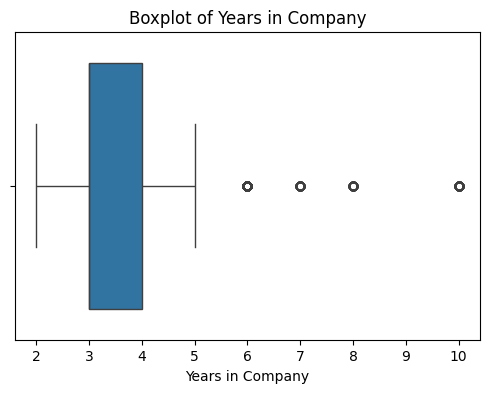

In [14]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6, 4))
sns.boxplot(data=df0, x='tenure')
plt.xlabel('Years in Company')
plt.title('Boxplot of Years in Company')
plt.show()

In [15]:
# Determine the number of rows containing outliers
df0[df0['tenure'] > 5]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


Certain types of models are more sensitive to outliers than others. Handling outiers depends on the model we will use.

#### Data Visualization

In this section we aim to understand the following:
1. The relationship in between variables through pairplot and correlation plot.
2. Create visualization of our numerical variables versus our target variable left.
3. Visualize the categorical variables versus our target.
4. Understand Employee Turnover per Department.
5. Compare salary levels based on tenure.
6. Create a boxplot for the average working hours versus the number of projects assigned for those who stayed and left.

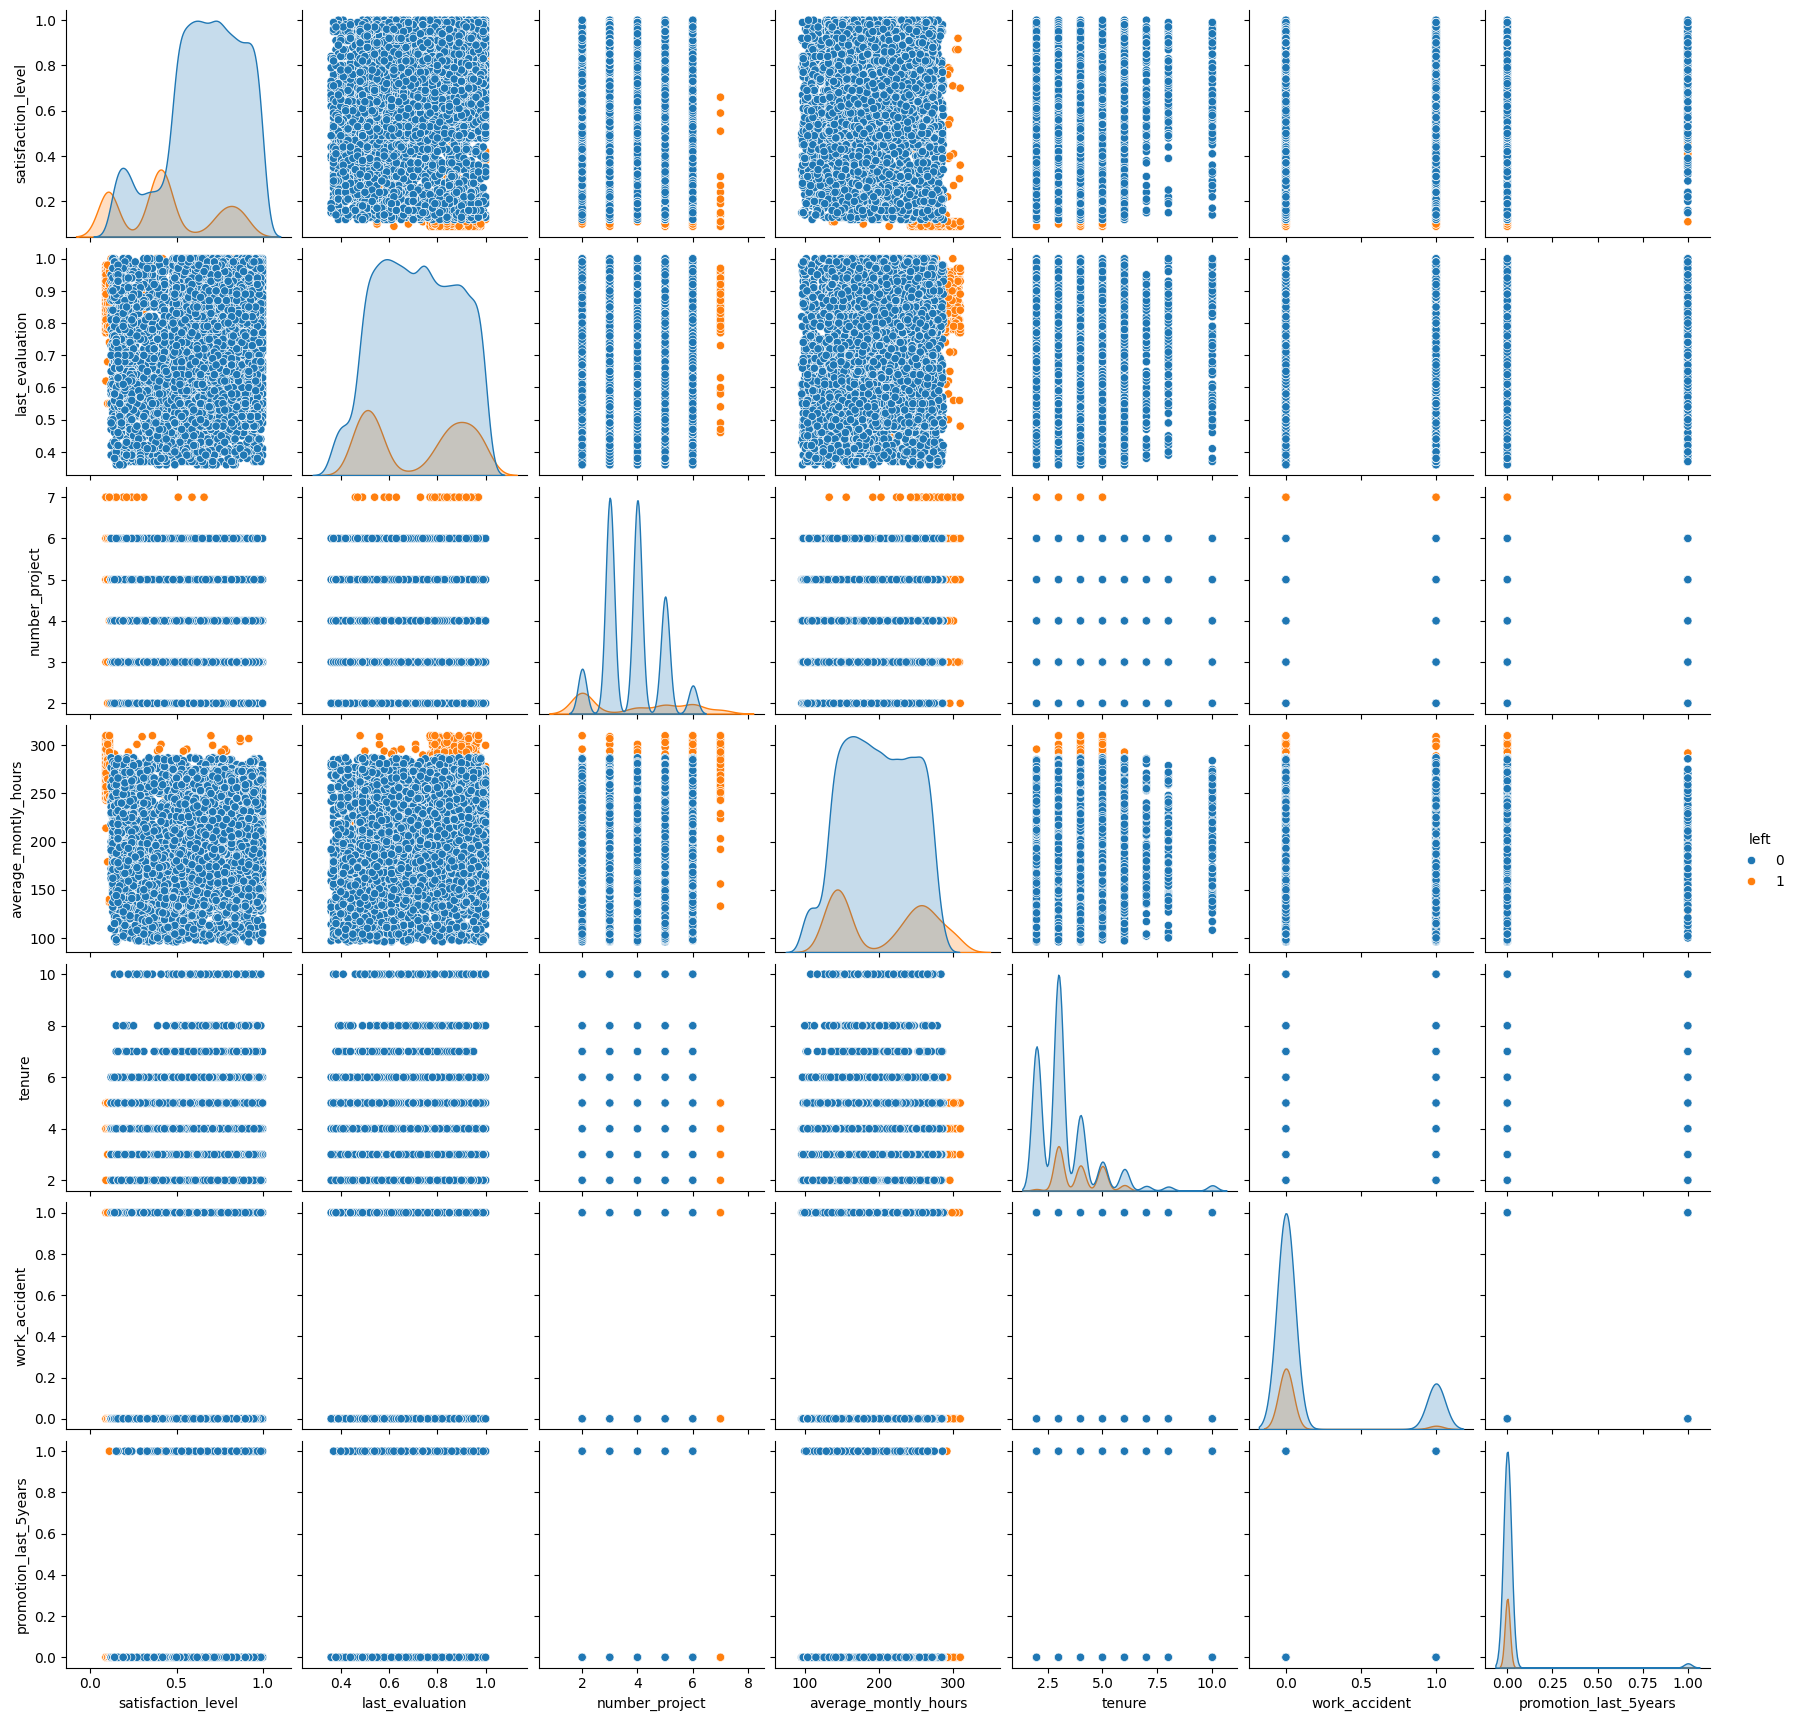

In [16]:
# Create a plot as needed
sns.pairplot(df0, hue='left')
plt.show()

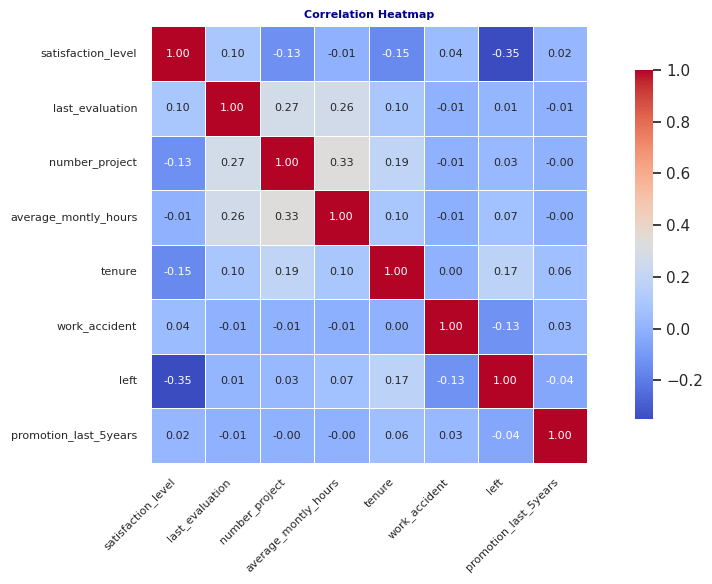

In [17]:
# Calculate the correlation matrix
correlation_matrix = df0.select_dtypes(include = ['float64', 'int64']).corr()

# Set a beautiful theme
sns.set_theme(style="white")

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, square=True, cbar_kws={"shrink": 0.8}, annot_kws={"size": 8})

# Add title and labels with styling
plt.title('Correlation Heatmap', fontsize=8, fontweight='bold', color='darkblue')
plt.xticks(fontsize=8, rotation=45, ha='right')
plt.yticks(fontsize=8, rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

/tmp/ipython-input-3957202281.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=left_counts, x='left', y='count', palette='Set2')


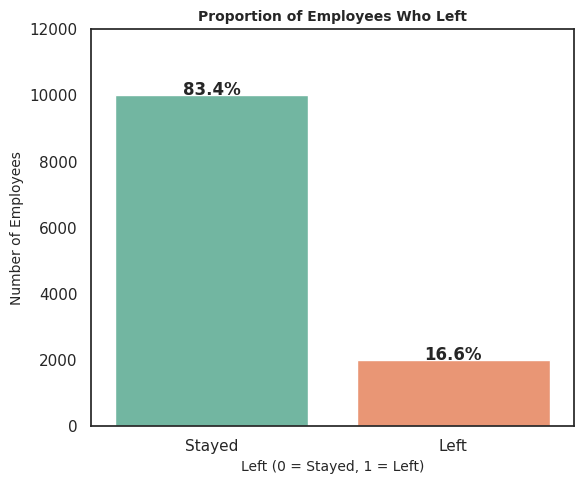

In [80]:
# Calculate counts and proportions
left_counts = df0['left'].value_counts().reset_index()
left_counts.columns = ['left', 'count']
left_counts['proportion'] = left_counts['count'] / left_counts['count'].sum()

plt.figure(figsize=(6,5))
sns.barplot(data=left_counts, x='left', y='count', palette='Set2')

# Add only proportion labels on top
for i, row in left_counts.iterrows():
    plt.text(i, row['count'] + 5, f"{row['proportion']:.1%}",
             ha='center', fontsize=12, fontweight='bold')

plt.title('Proportion of Employees Who Left', fontsize=10, fontweight='bold')
plt.xlabel('Left (0 = Stayed, 1 = Left)', fontsize=10)
plt.ylabel('Number of Employees', fontsize=10)
plt.xticks([0,1], ['Stayed','Left'])
plt.ylim(0, left_counts['count'].max() * 1.2)
plt.tight_layout()
plt.show()


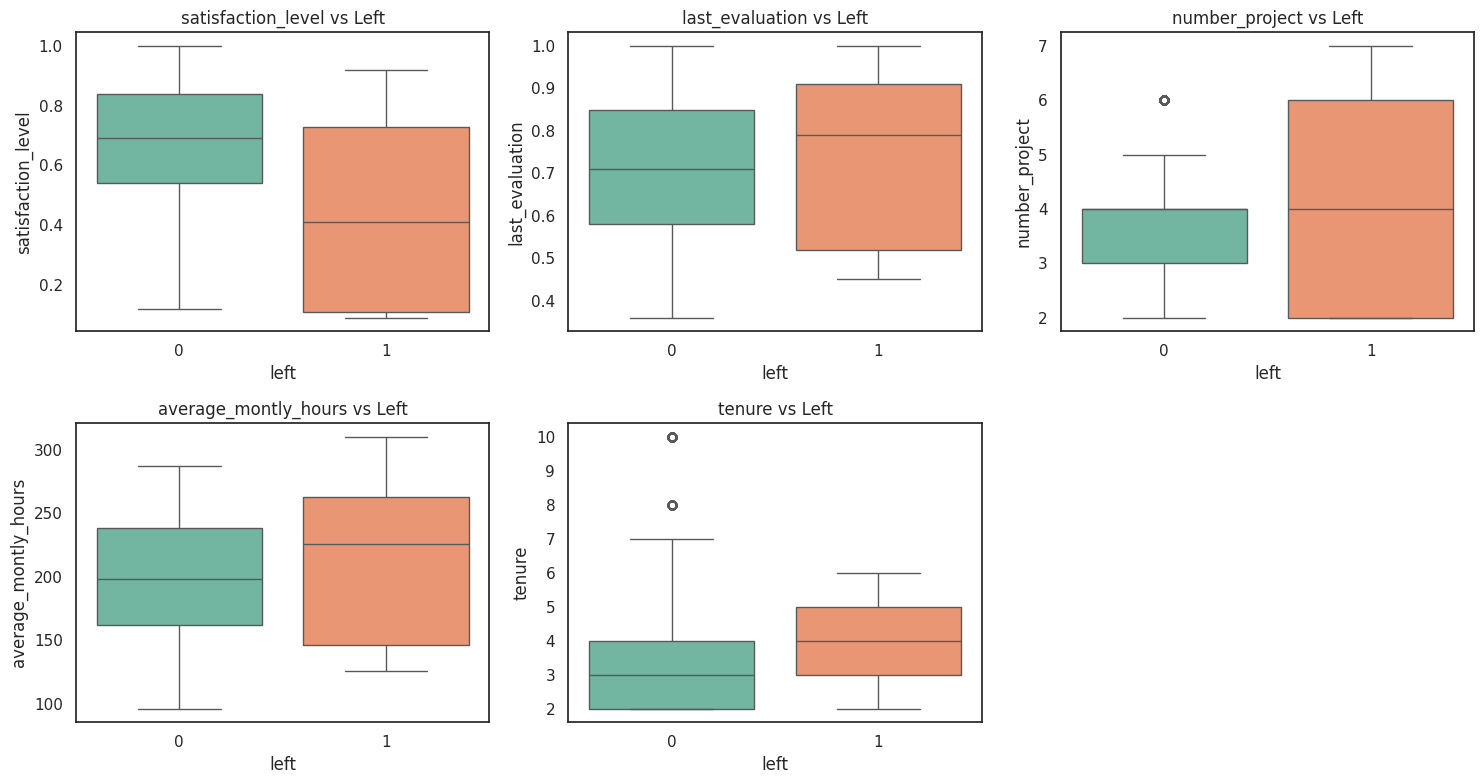

In [18]:
# Create a Box Plot
num_cols = ['satisfaction_level', 'last_evaluation', 'number_project',
            'average_montly_hours', 'tenure']

plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(
        x="left",
        y=col,
        data=df0,
        hue="left",
        palette="Set2",
        legend=False
    )
    plt.title(f"{col} vs Left")

plt.tight_layout()
plt.show()


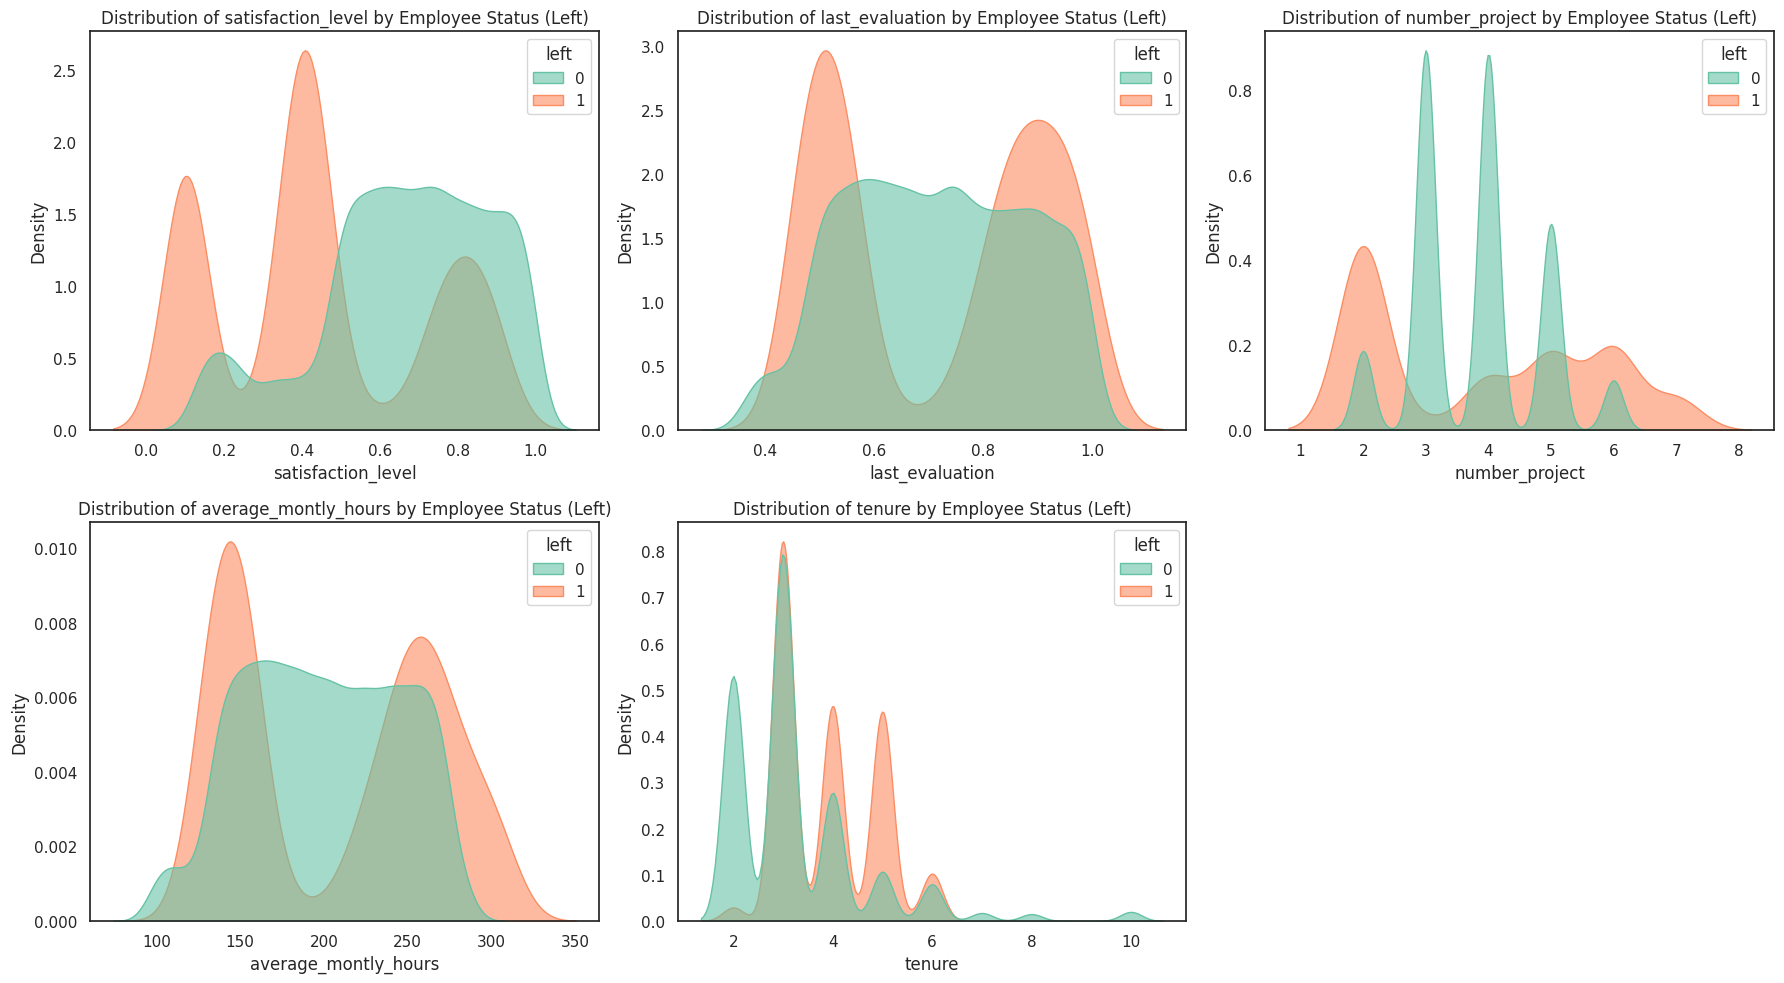

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.kdeplot(
        data=df0,
        x=col,
        hue="left",
        fill=True,
        common_norm=False,
        palette="Set2",
        alpha=0.6,
        ax=axes[i]
    )
    axes[i].set_title(f"Distribution of {col} by Employee Status (Left)", fontsize=12)

# Remove empty subplot if number of cols < 6
if len(num_cols) < len(axes):
    for j in range(len(num_cols), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

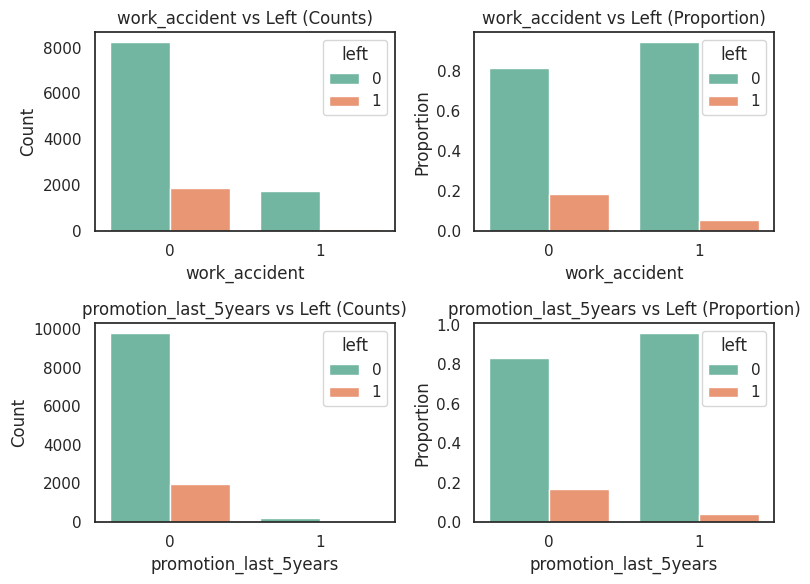

In [20]:
cat_cols = ["work_accident", "promotion_last_5years"]

fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    # --- Countplot ---
    sns.countplot(data=df0, x=col, hue="left", palette="Set2", ax=axes[i*2])
    axes[i*2].set_title(f"{col} vs Left (Counts)")
    axes[i*2].set_xlabel(col)
    axes[i*2].set_ylabel("Count")

    # --- Proportion plot ---
    prop = (
        df0.groupby(col)["left"]
           .value_counts(normalize=True)
           .rename("proportion")
           .reset_index()
    )
    sns.barplot(data=prop, x=col, y="proportion", hue="left", palette="Set2", ax=axes[i*2+1])
    axes[i*2+1].set_title(f"{col} vs Left (Proportion)")
    axes[i*2+1].set_xlabel(col)
    axes[i*2+1].set_ylabel("Proportion")

plt.tight_layout()
plt.show()

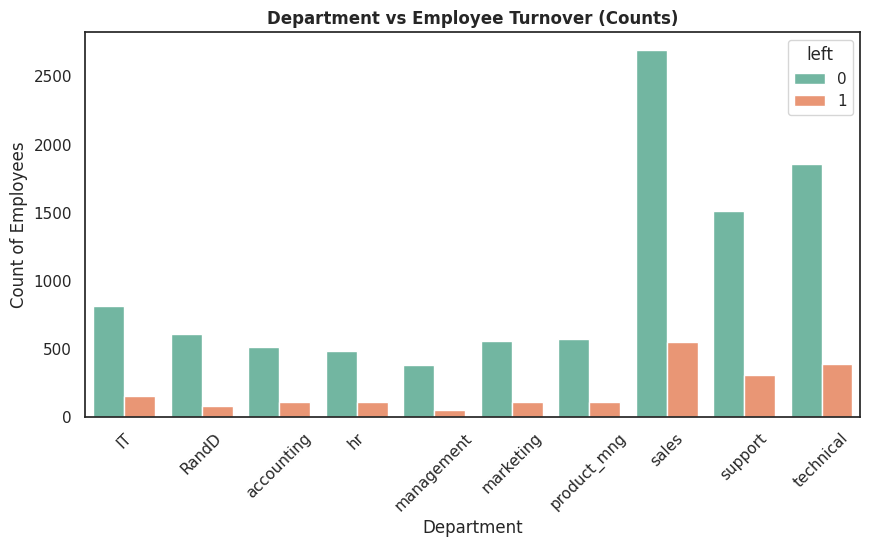

In [44]:
plt.figure(figsize=(10,5))

dept_counts = (
    df0.groupby("department")["left"]
       .value_counts()
       .rename("count")
       .reset_index()
)

sns.barplot(data=dept_counts, x="department", y="count", hue="left", palette="Set2")
plt.title("Department vs Employee Turnover (Counts)", fontsize = 12, fontweight = 'bold')
plt.xlabel("Department")
plt.ylabel("Count of Employees")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-1043875318.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=dept_left_counts, x='department', y='proportion', palette='Set2')


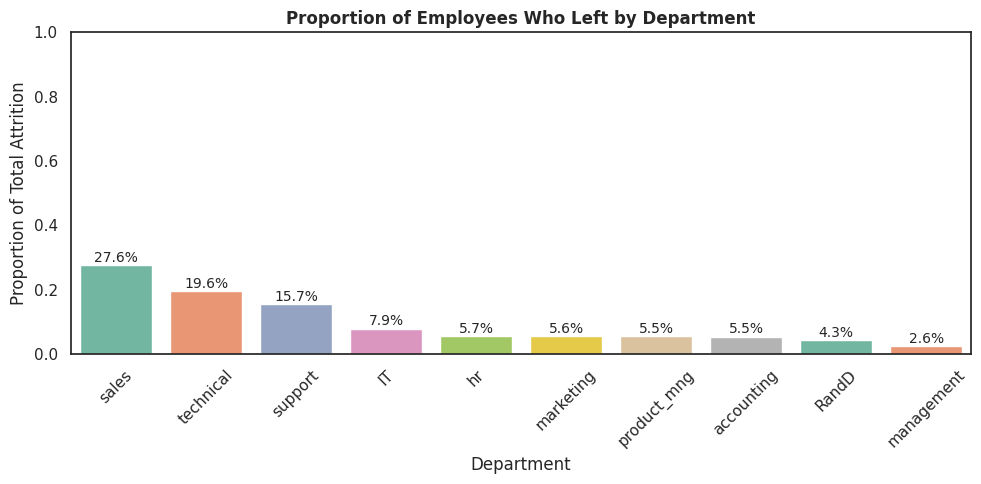

In [43]:
# Filter only employees who left
df_left = df0[df0['left'] == 1]

# Count number of employees who left per department
dept_left_counts = df_left['department'].value_counts().reset_index()
dept_left_counts.columns = ['department', 'count']

# Calculate proportion relative to total employees who left
dept_left_counts['proportion'] = dept_left_counts['count'] / dept_left_counts['count'].sum()

# Sort by proportion descending
dept_left_counts = dept_left_counts.sort_values(by='proportion', ascending=False)

# Plot
plt.figure(figsize=(10,5))
ax = sns.barplot(data=dept_left_counts, x='department', y='proportion', palette='Set2')

# Add bar labels
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,  # x position
        height + 0.01,                   # slightly above the bar
        f"{height:.1%}",                 # format as percentage
        ha='center',
        fontsize=10
    )

plt.title('Proportion of Employees Who Left by Department', fontsize=12, fontweight='bold')
plt.xlabel('Department', fontsize=12)
plt.ylabel('Proportion of Total Attrition', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


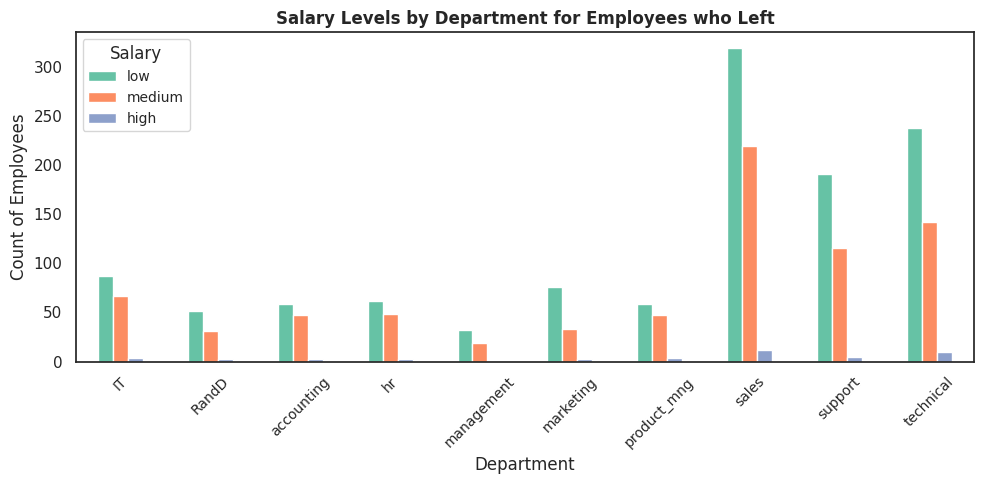

In [45]:
# Filter only employees who left
df_left = df0[df0['left'] == 1]

# Group by department and salary, count occurrences
salary_data = df_left.groupby('department')['salary'].value_counts().reset_index(name='count')

# Pivot the data so salary levels become separate columns
salary_pivot = salary_data.pivot(index='department', columns='salary', values='count').fillna(0)
salary_pivot = salary_pivot[['low', 'medium', 'high']]  # ensure correct legend order

# Get Set2 palette from seaborn
colors = sns.color_palette("Set2", n_colors=3)

# Plot the bar chart
salary_pivot.plot(kind='bar', figsize=(10, 5), stacked=False, color=colors)

# Add chart title and labels
plt.title('Salary Levels by Department for Employees who Left', fontsize=12, fontweight='bold')
plt.xlabel('Department', fontsize=12)
plt.ylabel('Count of Employees', fontsize=12)
plt.legend(title='Salary', fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

plt.show()


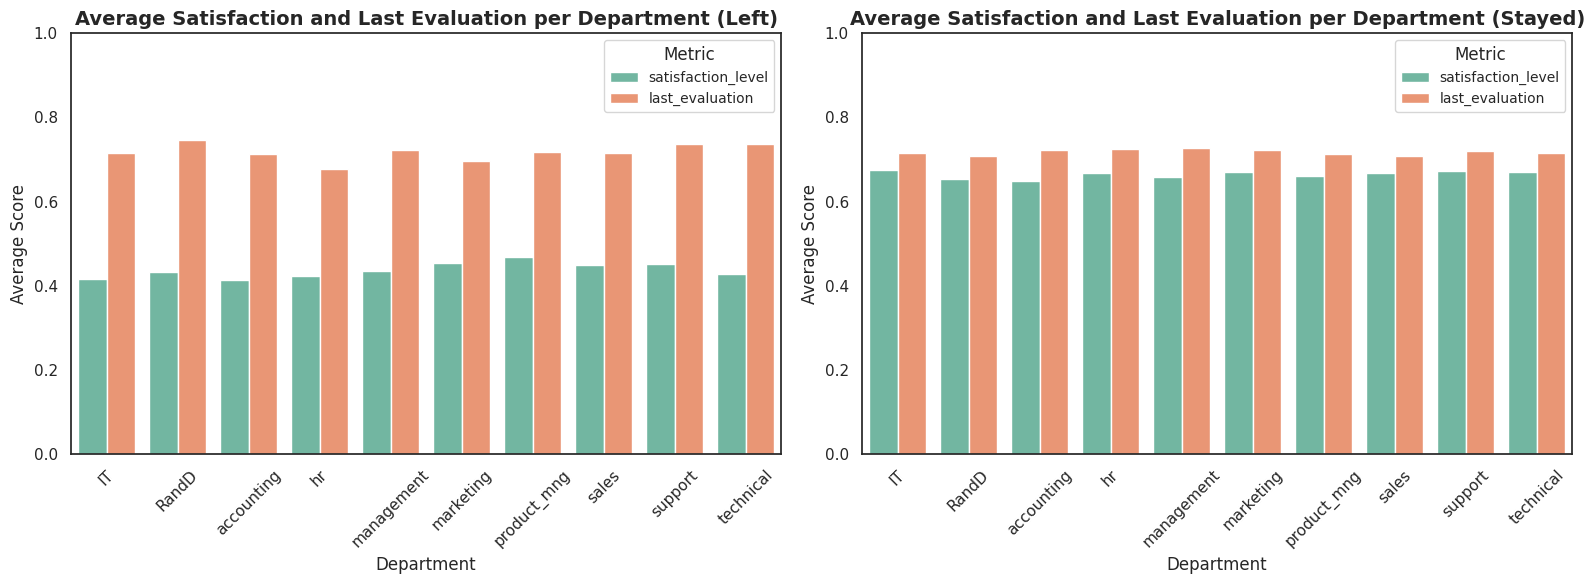

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create figure with 2 subplots
fig, axes = plt.subplots(figsize=(16,6), ncols=2, nrows=1)

# Plot order: first left=1, then left=0
for i, status in enumerate([1, 0]):
    df_subset = df0[df0['left'] == status]

    # Calculate average satisfaction_level and last_evaluation per department
    dept_avg = df_subset.groupby('department')[['satisfaction_level', 'last_evaluation']].mean().reset_index()

    # Melt the DataFrame for plotting
    dept_melt = dept_avg.melt(id_vars='department',
                              value_vars=['satisfaction_level', 'last_evaluation'],
                              var_name='Metric',
                              value_name='Average Score')

    # Plot grouped bar chart
    sns.barplot(data=dept_melt, x='department', y='Average Score', hue='Metric', palette='Set2', ax=axes[i])

    title = 'Left' if status == 1 else 'Stayed'
    axes[i].set_title(f'Average Satisfaction and Last Evaluation per Department ({title})', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Department', fontsize=12)
    axes[i].set_ylabel('Average Score', fontsize=12)
    axes[i].set_ylim(0, 1)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Metric', fontsize=10)

plt.tight_layout()
plt.show()


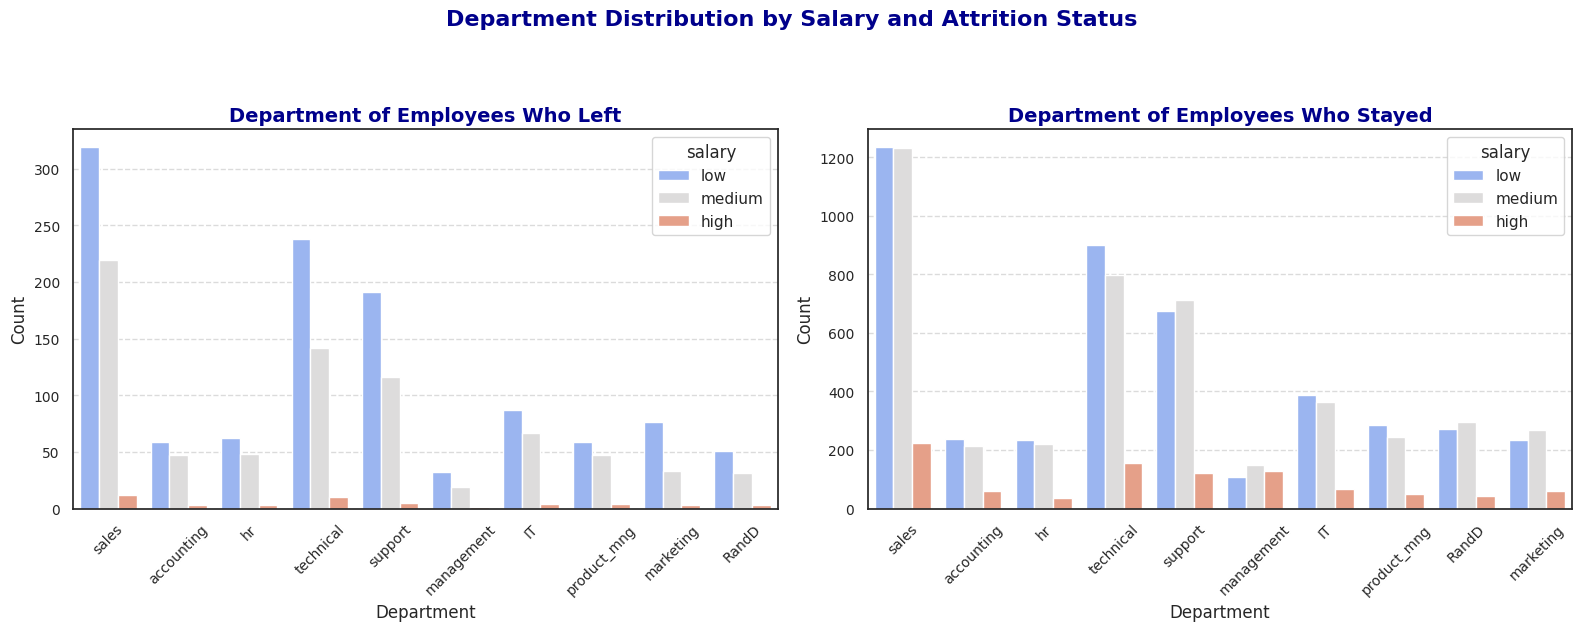

In [46]:
# Create a figure with 2 columns and 1 row
fig, axes = plt.subplots(figsize=(16, 6), ncols=2, nrows=1)

# Plot for employees who left
sns.countplot(
    data=df0[df0['left'] == 1],
    x='department',
    hue='salary',
    hue_order=['low', 'medium', 'high'],
    dodge=True,
    palette='coolwarm',
    ax=axes[0]
)
axes[0].set_title('Department of Employees Who Left', fontsize=14, fontweight='bold', color='darkblue')
axes[0].set_xlabel('Department', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)

# Plot for employees who stayed
sns.countplot(
    data=df0[df0['left'] == 0],
    x='department',
    hue='salary',
    hue_order=['low', 'medium', 'high'],
    dodge=True,
    palette='coolwarm',
    ax=axes[1]
)
axes[1].set_title('Department of Employees Who Stayed', fontsize=14, fontweight='bold', color='darkblue')
axes[1].set_xlabel('Department', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

# Add overall title and adjust layout
fig.suptitle('Department Distribution by Salary and Attrition Status', fontsize=16, fontweight='bold', color='darkblue', y=1.05)
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust for the overall title

# Show the plots
plt.show()


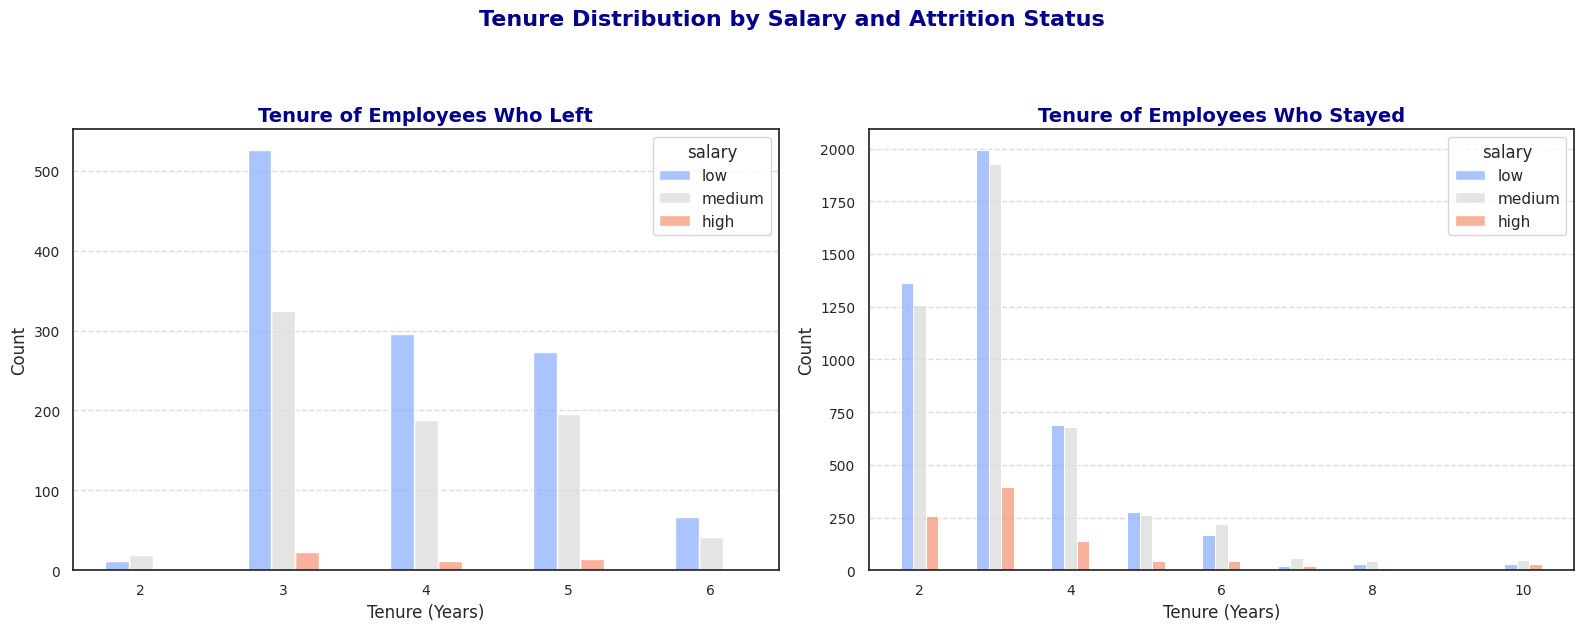

In [24]:
# Create a figure with 2 columns and 1 row
fig, axes = plt.subplots(figsize=(16, 6), ncols=2, nrows=1)

# Plot for employees who left
sns.histplot(
    data=df0[df0['left'] == 1],
    x='tenure',
    hue='salary',
    discrete=True,
    hue_order=['low', 'medium', 'high'],
    multiple='dodge',
    shrink=0.5,
    ax=axes[0],
    palette='coolwarm'
)
axes[0].set_title('Tenure of Employees Who Left', fontsize=14, fontweight='bold', color='darkblue')
axes[0].set_xlabel('Tenure (Years)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].tick_params(axis='both', labelsize=10)

# Plot for employees who stayed
sns.histplot(
    data=df0[df0['left'] == 0],
    x='tenure',
    hue='salary',
    discrete=True,
    hue_order=['low', 'medium', 'high'],
    multiple='dodge',
    shrink=0.5,
    ax=axes[1],
    palette='coolwarm'
)
axes[1].set_title('Tenure of Employees Who Stayed', fontsize=14, fontweight='bold', color='darkblue')
axes[1].set_xlabel('Tenure (Years)', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].tick_params(axis='both', labelsize=10)

# Add overall title and adjust layout
fig.suptitle('Tenure Distribution by Salary and Attrition Status', fontsize=16, fontweight='bold', color='darkblue', y=1.05)
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust for the overall title

# Show the plots
plt.show()

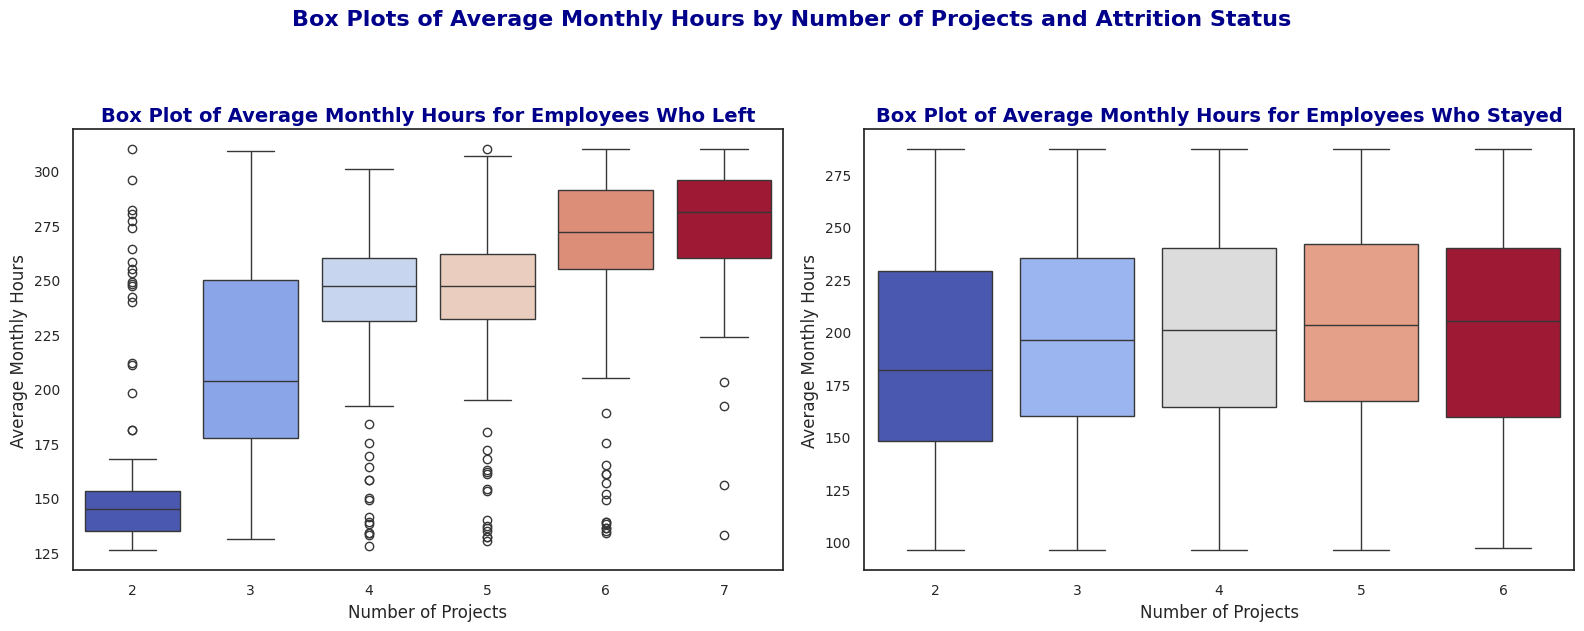

In [25]:
# Create a figure with 2 columns and 1 row
fig, axes = plt.subplots(figsize=(16, 6), ncols=2, nrows=1)

# Box plot for employees who left
sns.boxplot(
    data=df0[df0['left'] == 1],
    x='number_project',
    y='average_montly_hours',
    hue='number_project',
    ax=axes[0],
    legend = False,
    palette='coolwarm'
)
axes[0].set_title('Box Plot of Average Monthly Hours for Employees Who Left', fontsize=14, fontweight='bold', color='darkblue')
axes[0].set_xlabel('Number of Projects', fontsize=12)
axes[0].set_ylabel('Average Monthly Hours', fontsize=12)
axes[0].tick_params(axis='both', labelsize=10)

# Box plot for employees who stayed
sns.boxplot(
    data=df0[df0['left'] == 0],
    x='number_project',
    y='average_montly_hours',
    hue='number_project',
    ax=axes[1],
    legend = False,
    palette='coolwarm'
)
axes[1].set_title('Box Plot of Average Monthly Hours for Employees Who Stayed', fontsize=14, fontweight='bold', color='darkblue')
axes[1].set_xlabel('Number of Projects', fontsize=12)
axes[1].set_ylabel('Average Monthly Hours', fontsize=12)
axes[1].tick_params(axis='both', labelsize=10)

# Add overall title and adjust layout
fig.suptitle('Box Plots of Average Monthly Hours by Number of Projects and Attrition Status', fontsize=16, fontweight='bold', color='darkblue', y=1.05)
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust for the overall title

# Show the plots
plt.show()

#### Feature Engineering

The following features will be created and explored in this section:
- `overworked` if an employee spends more than 160 hours per month

In [56]:
df0['overworked'] = df0['average_montly_hours'].apply(
    lambda x: 1 if x > 160 else 0)

In [57]:
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary,overworked
0,0.38,0.53,2,157,3,0,1,0,sales,low,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,0


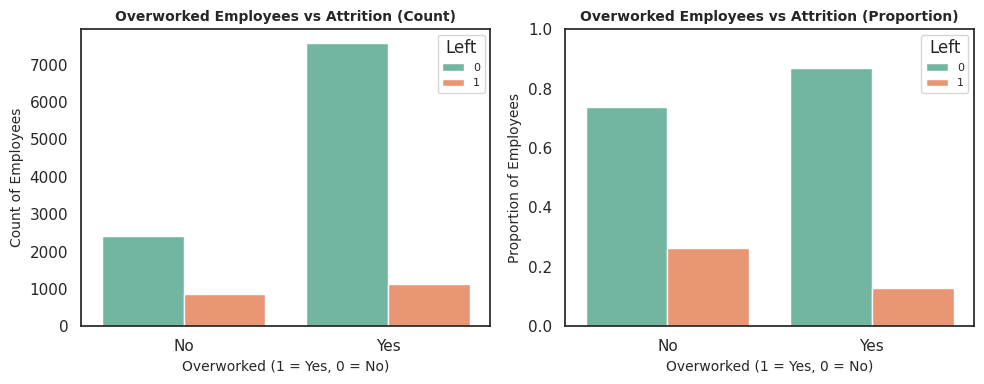

In [69]:

# Create figure with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(figsize=(10,4), ncols=2)

# ---- Count plot ----
sns.countplot(data=df0, x='overworked', hue='left', palette='Set2', ax=axes[0])
axes[0].set_title('Overworked Employees vs Attrition (Count)', fontsize=10, fontweight='bold')
axes[0].set_xlabel('Overworked (1 = Yes, 0 = No)', fontsize=10)
axes[0].set_ylabel('Count of Employees', fontsize=10)
axes[0].set_xticks([0,1])
axes[0].set_xticklabels(['No','Yes'])
axes[0].legend(title='Left', fontsize=8)

# ---- Proportion plot ----
# Calculate proportions
prop_df = (
    df0.groupby('overworked')['left']
       .value_counts(normalize=True)
       .rename('proportion')
       .reset_index()
)

sns.barplot(data=prop_df, x='overworked', y='proportion', hue='left', palette='Set2', ax=axes[1])
axes[1].set_title('Overworked Employees vs Attrition (Proportion)', fontsize=10, fontweight='bold')
axes[1].set_xlabel('Overworked (1 = Yes, 0 = No)', fontsize=10)
axes[1].set_ylabel('Proportion of Employees', fontsize=10)
axes[1].set_xticks([0,1])
axes[1].set_xticklabels(['No','Yes'])
axes[1].set_ylim(0,1)
axes[1].legend(title='Left', fontsize=8)

plt.tight_layout()
plt.show()

#### Model Selection

The following models will be fitted in our data:
- Logistic Regression
- Random Forest
- XGBoost
- LightGBM

In [70]:
df = df0.drop(columns = ['work_accident', 'department', 'average_montly_hours'])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   tenure                 11991 non-null  int64  
 4   left                   11991 non-null  int64  
 5   promotion_last_5years  11991 non-null  int64  
 6   salary                 11991 non-null  object 
 7   overworked             11991 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 843.1+ KB


In [72]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('left')
num_cols

Index(['satisfaction_level', 'last_evaluation', 'number_project', 'tenure',
       'promotion_last_5years', 'overworked'],
      dtype='object')

In [73]:
ord_cols = ['salary']
ord_cols

['salary']

In [74]:
num_pipeline = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])
ord_pipeline = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                               ('ord', OrdinalEncoder())])

In [75]:
col_trans = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, num_cols),
    ('ord_pipeline', ord_pipeline, ord_cols)],
    remainder='drop',
    n_jobs=-1)

In [81]:
y = df['left']
X = df.drop(['left'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state= 42)

In [82]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   'roc_auc' : 'mean_test_roc_auc'
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    roc_auc = best_estimator_results.mean_test_roc_auc

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'roc_auc' : [roc_auc]
                          }
                         )

    return table

##### Logistic Regression

In [83]:
LRpipeline = Pipeline(steps=[
    ('preprocessor', col_trans),
    ('logisticregclassifier', LogisticRegression(random_state = 42))
])

cv_params = {
                'logisticregclassifier__penalty' : ['l1', 'l2'],
                'logisticregclassifier__C' : [0.01, 10, 100],
                'logisticregclassifier__solver' : ['saga'], #need to use saga as this supports all penalty types
                'logisticregclassifier__max_iter' : [1000]
            }



scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc' : 'roc_auc'
    }

logit_cv = GridSearchCV(LRpipeline, cv_params, scoring = scoring, refit = 'f1', n_jobs = -1, cv = 5)

In [84]:
logit_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['satisfaction_level', 'last_evaluation', 'number_project', 'tenure',
       'promotion_last_5years', 'overworked'],
      dtype='object')),
                                                                        ('ord_pipeline',
                                                                         Pipeline(steps=[...
                                       ('logisticregclassifier',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'logisticregclassifier__C': [0.01, 10, 100],
                         'logisticregclassifier__max_iter': [1000],
                         'logisticregclassifier__penalty': ['l1', 'l2'],
                         'logisticregclassifier__solver': ['saga']},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [85]:
y_pred = logit_cv.predict(X_test)

In [86]:
logit_cv.best_params_

{'logisticregclassifier__C': 10,
 'logisticregclassifier__max_iter': 1000,
 'logisticregclassifier__penalty': 'l1',
 'logisticregclassifier__solver': 'saga'}

In [89]:
results_logit = make_results('LogisticRegression', logit_cv, 'roc_auc')
results_logit

,model,precision,recall,F1,accuracy,roc_auc
0,LogisticRegression,0.267519,0.070328,0.111112,0.814412,0.80421


In [87]:
print(classification_report(y_test, y_pred, target_names = ['Retain', 'Leave']))

              precision    recall  f1-score   support

      Retain       0.84      0.96      0.90      2500
       Leave       0.28      0.07      0.11       498

    accuracy                           0.82      2998
   macro avg       0.56      0.52      0.50      2998
weighted avg       0.75      0.82      0.77      2998



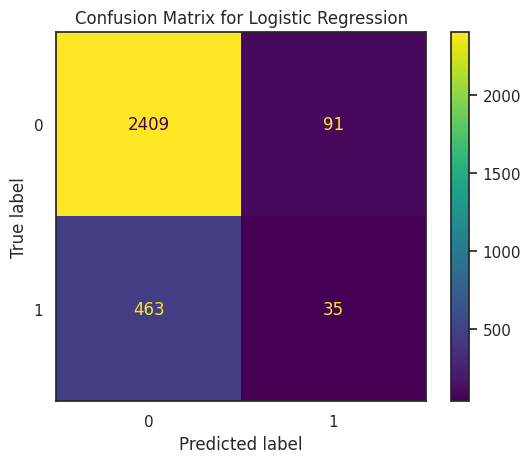

In [88]:
# Retrieve the best model from GridSearchCV
best_logit_model = logit_cv.best_estimator_

# Generate predictions on the test set
y_pred = best_logit_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_logit_model.classes_)
disp.plot()
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

##### Random Forest

In [90]:
# Define the complete pipeline with preprocessing and model
RFpipeline = Pipeline(steps=[
    ('preprocessor', col_trans),
    ('randomforestclassifier', RandomForestClassifier(random_state=42))
])

# Define the hyperparameter grid for GridSearchCV
cv_params = {
    'randomforestclassifier__n_estimators': [500],
    'randomforestclassifier__max_depth': [None, 10, 20],
    'randomforestclassifier__max_features': ['sqrt', 'log2'],
    'randomforestclassifier__min_samples_split': [5, 10]
}

# Define the scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Initialize GridSearchCV with the complete pipeline
rf_cv = GridSearchCV(
    estimator=RFpipeline,
    param_grid=cv_params,
    scoring=scoring,
    cv=5,
    n_jobs=-1,
    refit='roc_auc'
)


In [91]:
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['satisfaction_level', 'last_evaluation', 'number_project', 'tenure',
       'promotion_last_5years', 'overworked'],
      dtype='object')),
                                                                        ('ord_pipeline',
                                                                         Pipeline(steps=[...
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [None, 10, 20],
                         'randomforestclassifier__max_features': ['sqrt',
                                                                  'log2'],
                         'randomforestclassifier__min_samples_split': [5, 10],
                         'randomforestclassifier__n_estimators': [500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [92]:
rf_cv.best_params_

{'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__min_samples_split': 10,
 'randomforestclassifier__n_estimators': 500}

In [93]:
rf_cv.best_score_

np.float64(0.9796495866160881)

In [94]:
results_rf_cv = make_results('RandomForestCV', rf_cv, 'roc_auc')
results_rf_cv

,model,precision,recall,F1,accuracy,roc_auc
0,RandomForestCV,0.980388,0.902869,0.939982,0.980874,0.97965


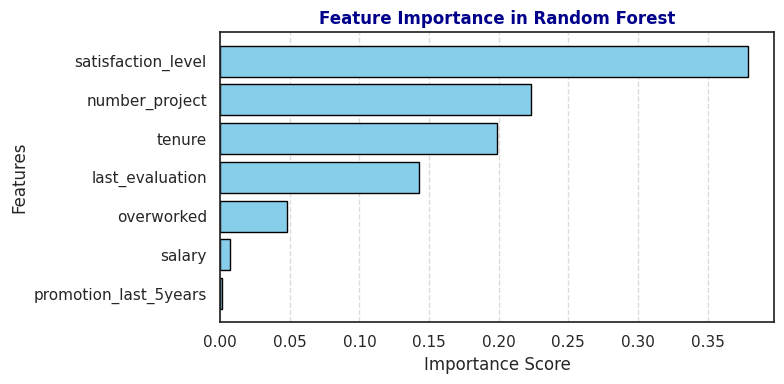

In [95]:
# Access preprocessed feature names
preprocessed_features = rf_cv.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

# Remove prefixes added by ColumnTransformer
cleaned_features = [name.split('__')[-1] for name in preprocessed_features]  # Extract the actual feature names

# Get feature importances
best_rf_model = rf_cv.best_estimator_.named_steps['randomforestclassifier']
feature_importances = best_rf_model.feature_importances_

# Create DataFrame for organization
importance_df = pd.DataFrame({'Feature': cleaned_features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(8, 4))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue', edgecolor='black')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance in Random Forest', fontsize=12, fontweight='bold', color='darkblue')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### XGBoost

In [96]:
XGBpipeline = Pipeline(steps=[
    ('preprocessor', col_trans),
    ('xgbclassifier', XGBClassifier(random_state = 42))
])

In [97]:
cv_params = {
              'xgbclassifier__n_estimators' : [500],
              'xgbclassifier__max_depth' : [5, 10, 15],
              'xgbclassifier__eta' : [0.001, 0.01, 1],
              'xgbclassifier__min_child_weight' : [1, 5, 10]
            }

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc' : 'roc_auc'
    }

xgb_cv = GridSearchCV(XGBpipeline, cv_params, scoring=scoring, cv=5, n_jobs=-1, refit = 'roc_auc')

In [98]:
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['satisfaction_level', 'last_evaluation', 'number_project', 'tenure',
       'promotion_last_5years', 'overworked'],
      dtype='object')),
                                                                        ('ord_pipeline',
                                                                         Pipeline(steps=[...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'xgbclassifier__eta': [0.001, 0.01, 1],
                         'xgbclassifier__max_depth': [5, 10, 15],
                         'xgbclassifier__min_child_weight': [1, 5, 10],
                         'xgbclassifier__n_estimators': [500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [99]:
xgb_cv.best_params_

{'xgbclassifier__eta': 0.01,
 'xgbclassifier__max_depth': 5,
 'xgbclassifier__min_child_weight': 5,
 'xgbclassifier__n_estimators': 500}

In [100]:
xgb_cv.best_score_

np.float64(0.9825737596612122)

In [101]:
results_xgb_cv = make_results('XGBClassifier', xgb_cv, 'roc_auc')
results_xgb_cv

,model,precision,recall,F1,accuracy,roc_auc
0,XGBClassifier,0.961803,0.9089,0.93458,0.978872,0.982574


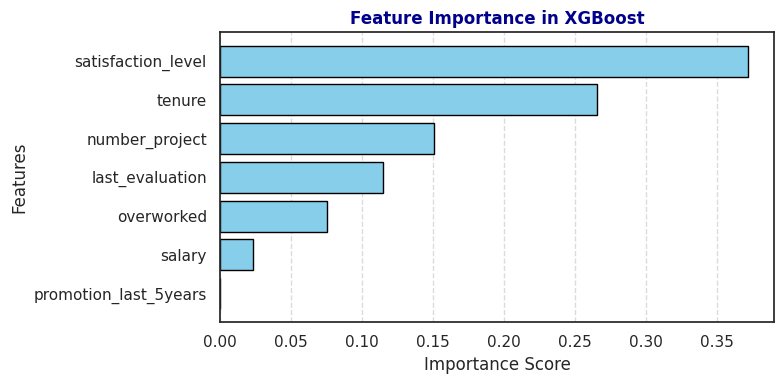

In [102]:
# Access preprocessed feature names
preprocessed_features = xgb_cv.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

# Clean feature names by removing pipeline prefixes
cleaned_features = [name.split('__')[-1] for name in preprocessed_features]

# Get feature importances from the best XGBoost model
best_xgb_model = xgb_cv.best_estimator_.named_steps['xgbclassifier']
feature_importances = best_xgb_model.feature_importances_

# Create a DataFrame for better organization
importance_df = pd.DataFrame({'Feature': cleaned_features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue', edgecolor='black')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance in XGBoost', fontsize=12, fontweight='bold', color='darkblue')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### LGB

In [103]:
LGBpipeline = Pipeline(steps=[
    ('preprocessor', col_trans),
    ('lgbclassifier', lgb.LGBMClassifier(random_state=42))
])

cv_params = {
    'lgbclassifier__n_estimators': [500],  # Number of boosting rounds
    'lgbclassifier__max_depth': [10, 20],  # Maximum tree depth
    'lgbclassifier__learning_rate': [0.01, 0.1],  # Learning rate (use 'learning_rate' instead of 'eta')
    'lgbclassifier__num_leaves' : [30, 50],
}

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

lgb_cv = GridSearchCV(LGBpipeline, cv_params, cv = 5, scoring = scoring, refit = 'roc_auc', n_jobs = -1)

In [104]:
lgb_cv.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1493, number of negative: 7500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 184
[LightGBM] [Info] Number of data points in the train set: 8993, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166018 -> initscore=-1.614116
[LightGBM] [Info] Start training from score -1.614116


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['satisfaction_level', 'last_evaluation', 'number_project', 'tenure',
       'promotion_last_5years', 'overworked'],
      dtype='object')),
                                                                        ('ord_pipeline',
                                                                         Pipeline(steps=[...
                                                                         ['salary'])])),
                                       ('lgbclassifier',
                                        LGBMClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'lgbclassifier__learning_rate': [0.01, 0.1],
                         'lgbclassifier__max_depth': [10, 20],
                         'lgbclassifier__n_estimators': [500],
                         'lgbclassifier__num_leaves': [30, 50]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [105]:
lgb_cv.best_params_

{'lgbclassifier__learning_rate': 0.01,
 'lgbclassifier__max_depth': 20,
 'lgbclassifier__n_estimators': 500,
 'lgbclassifier__num_leaves': 30}

In [106]:
lgb_cv.best_score_

np.float64(0.981802236388259)

In [107]:
results_lgb_cv= make_results('LGB', lgb_cv, 'roc_auc')
results_lgb_cv

,model,precision,recall,F1,accuracy,roc_auc
0,LGB,0.970759,0.911582,0.940212,0.980763,0.981802


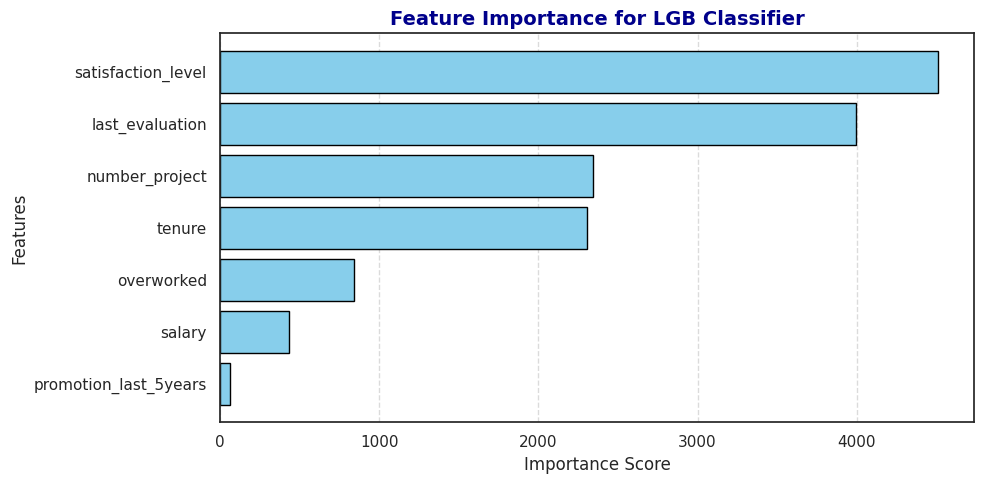

In [108]:
# Get the best LightGBM model
best_model = lgb_cv.best_estimator_.named_steps['lgbclassifier']

# Extract feature importance scores
importance = best_model.feature_importances_

# Extract feature names manually (fallback if `get_feature_names_out()` fails)
try:
    preprocessed_features = col_trans.get_feature_names_out()
except AttributeError:  # Handles cases where `get_feature_names_out()` isn't supported
    preprocessed_features = X_train.columns.tolist()

# Clean feature names to remove prefixes
cleaned_features = [name.split('__')[-1] for name in preprocessed_features]

# Ensure the number of feature names matches the importance values
if len(cleaned_features) != len(importance):
    print("Warning: Mismatch in feature names and importance values. Using original column names.")
    cleaned_features = X_train.columns.tolist()

# Sort features by importance
sorted_indices = np.argsort(importance)[::-1]  # Sort in descending order
sorted_importance = importance[sorted_indices]
sorted_features = [cleaned_features[i] for i in sorted_indices]

# Plot sorted feature importance
plt.figure(figsize=(10, 5))
plt.barh(sorted_features, sorted_importance, color='skyblue', edgecolor='black')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance for LGB Classifier', fontsize=14, fontweight='bold', color='darkblue')
plt.gca().invert_yaxis()  # Show most important features at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


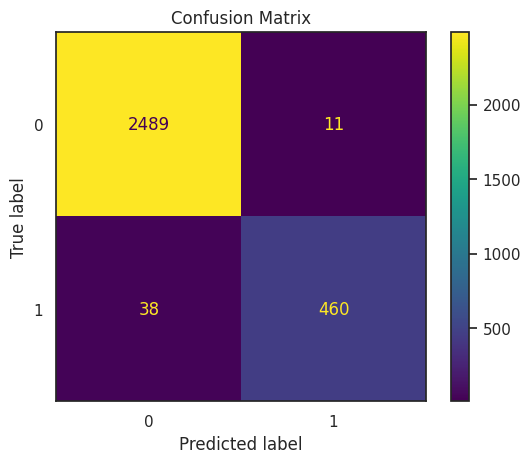

In [109]:
y_pred = lgb_cv.best_estimator_.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgb_cv.best_estimator_.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

#### Model Evaluation

We applied four different models to our dataset, assessing their performance using various evaluation metrics, including precision, recall, F1-score, accuracy, and ROC_AUC. Given the class imbalance in our dataset, accuracy was not our primary focus. Instead, we prioritized the ROC_AUC score to determine the best-performing model.

Our initial attempt with Logistic Regression resulted in poor precision and recall. The confusion matrix revealed 495 false negatives and no true negatives, highlighting the model’s inability to correctly classify the negative class.

To improve performance, we explored three ensemble learning techniques: Random Forest, XGBoost, and Light Gradient Boosting. These models significantly outperformed Logistic Regression across all evaluation metrics, achieving an F1-score of approximately 0.94 and a ROC_AUC score around 0.98.

Among the tested models, XG Boost emerged as the best fit, achieving a ROC_AUC score of 0.98.

Additionally, we conducted feature importance analysis across all ensemble learning models. The most influential features identified were `satisfaction_level`, `tenure`, `number_project` and `last_evaluation`.

In [110]:
results = pd.concat([results_logit, results_rf_cv, results_xgb_cv, results_lgb_cv], axis = 0)
results

,model,precision,recall,F1,accuracy,roc_auc
0,LogisticRegression,0.267519,0.070328,0.111112,0.814412,0.804210
0,RandomForestCV,0.980388,0.902869,0.939982,0.980874,0.979650
0,XGBClassifier,0.961803,0.908900,0.934580,0.978872,0.982574
0,LGB,0.970759,0.911582,0.940212,0.980763,0.981802


#### Conclusion and Recommendation

As both a data scientist and HR analytics practitioner, I interpret these findings not just in terms of statistical importance but also through the lens of organizational behavior and employee experience.

Our models identified satisfaction level, tenure, number of projects, and last evaluation as the most influential drivers of attrition. This signals a need for HR to focus on the organizational processes and cultural factors underpinning these variables.

- Employee Satisfaction: The average satisfaction score among employees who left was only 0.40, compared to 0.64 among those who stayed. Notably, no department exceeded 0.80 on this metric, which suggests systemic challenges in engagement and motivation. HR should leverage employee survey data to uncover the underlying drivers of dissatisfaction and develop targeted interventions.

- Tenure Patterns: Attrition risk peaks during the third to fifth year of employment, often a critical stage when employees either commit long-term or seek external opportunities. This warrants closer attention to career development pathways, recognition programs, and internal mobility options at this stage.

- Workload & Project Management: Employees who left were disproportionately assigned to 4–7 projects while working 250+ hours per month. This reflects a potential imbalance in workload allocation and raises questions about work-life balance and resource planning. Revisiting project assignment practices could mitigate burnout and improve retention.

From a modeling standpoint, while ensemble methods performed robustly despite outliers, we recommend HR analytics teams adopt more rigorous data preprocessing and outlier treatment for future predictive modeling. This will not only enhance logistic regression performance but also allow for more interpretable insights aligned with HR decision-making.
